In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [67]:
df = pd.read_csv('data/banknote_auth.csv')

In [68]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [70]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [71]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [72]:
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

In [73]:
df.columns

Index(['variance', 'skewness', 'curtosis', 'entropy', 'class'], dtype='object')

In [74]:
len(df)

1372

## Data Visualization

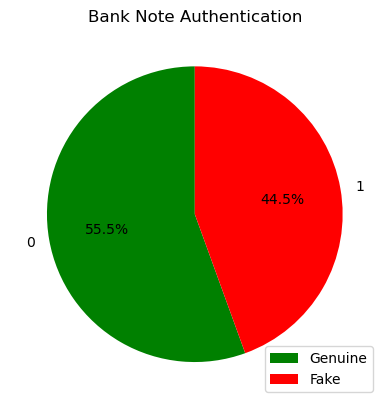

In [75]:
fake = {'Counterfeit': df["class"]}

fake_counts = fake['Counterfeit'].value_counts()

plt.pie(fake_counts, labels=fake_counts.index, autopct='%1.1f%%', startangle=90, colors=['green', 'red'])
plt.legend(labels=fake_counts.index, loc='upper right')
plt.legend(['Genuine', 'Fake'], loc='lower right')
plt.title('Bank Note Authentication')
plt.show()

C:\Users\Student\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


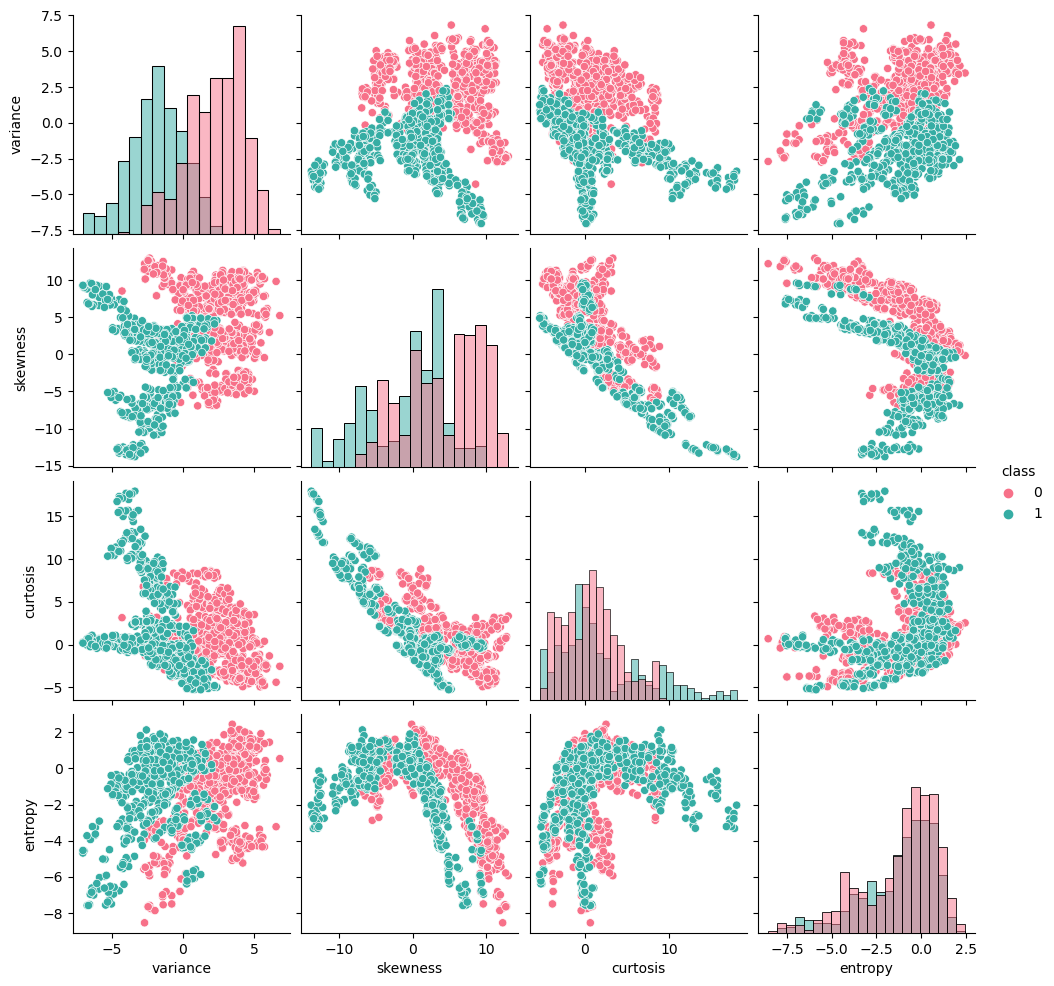

In [76]:
import seaborn as sns

sns.pairplot(df, hue='class', diag_kind='hist', palette='husl')
plt.show()

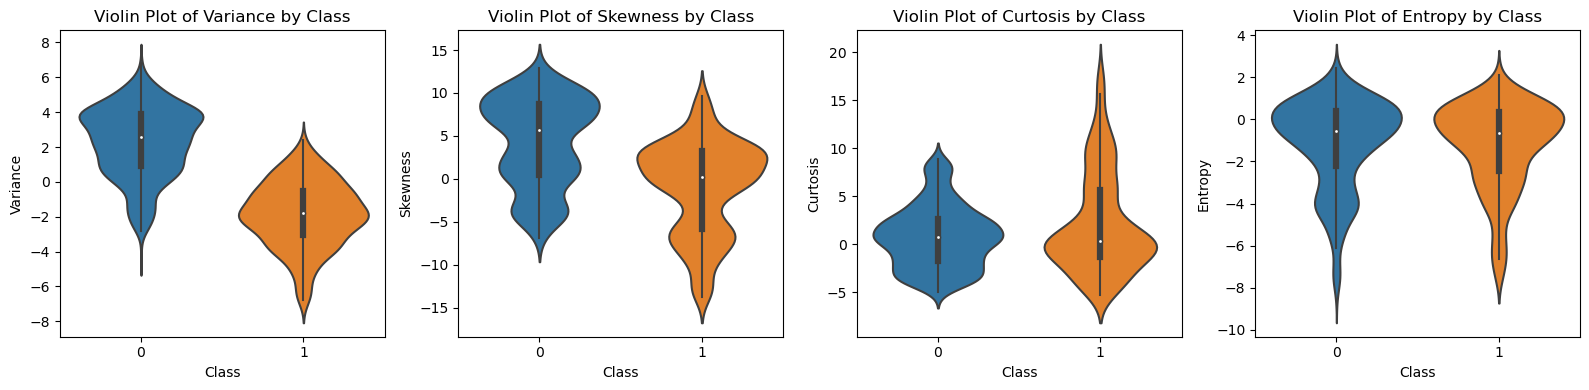

In [77]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

for i, feature in enumerate(df.columns[:-1]): 
    sns.violinplot(x='class', y=feature, data=df, ax=axes[i])
    axes[i].set_xlabel('Class')
    axes[i].set_ylabel(feature.capitalize()) 
    axes[i].set_title(f'Violin Plot of {feature.capitalize()} by Class')

plt.tight_layout()
plt.show()

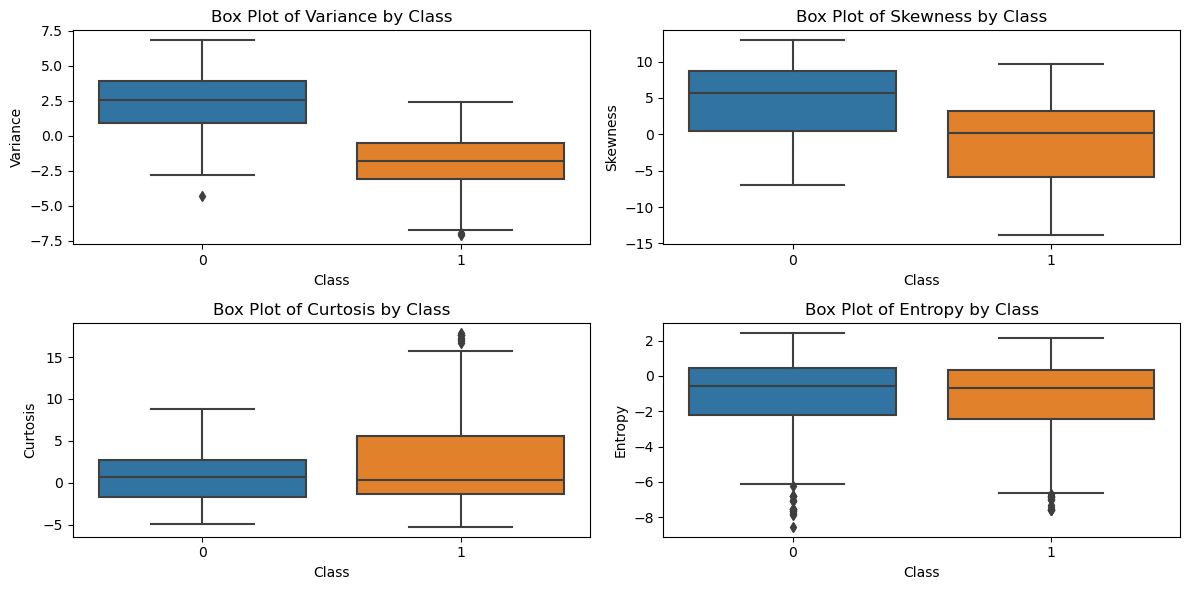

In [78]:
plt.figure(figsize=(12, 6)) 

for i, feature in enumerate(df.columns[:-1]): 
    plt.subplot(2, 2, i + 1)  
    sns.boxplot(x='class', y=feature, data=df)
    plt.xlabel('Class')
    plt.ylabel(feature.capitalize()) 
    plt.title(f'Box Plot of {feature.capitalize()} by Class')

plt.tight_layout()
plt.show()

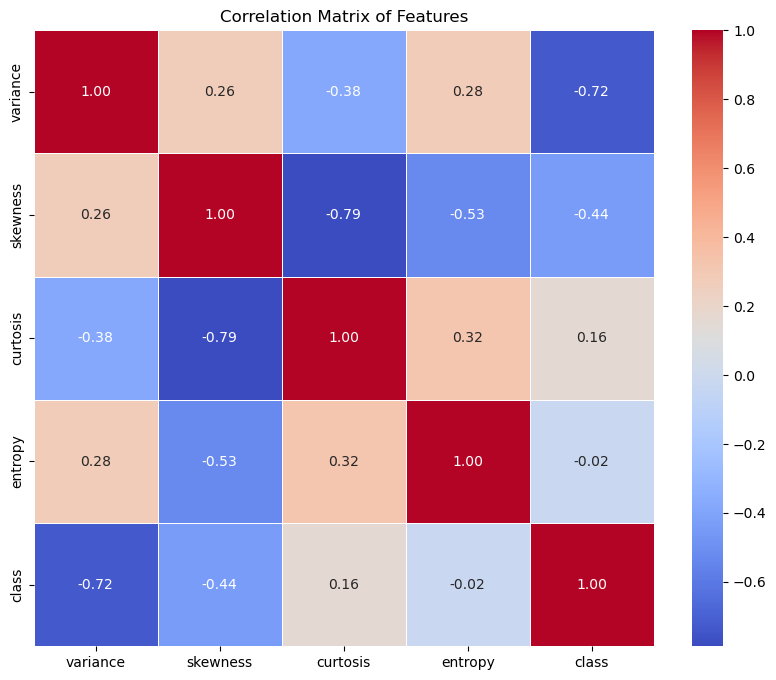

In [79]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

## Linear SVM

In [80]:
X = df.drop('class', axis=1)
y = df['class']

In [81]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

linear_model = SVC(kernel='linear', random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

linear_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [82]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

In [83]:
y_preds = linear_model.predict(X_test)
y_preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0], dtype=int64)

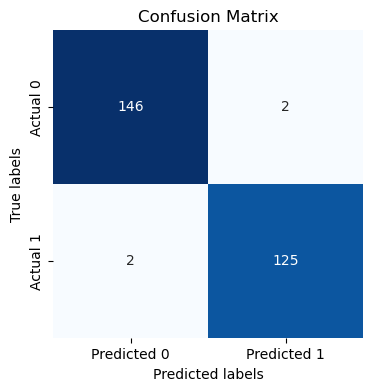

In [95]:
cm = confusion_matrix(y_test, y_preds)

plt.figure(figsize=(4, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [84]:
linear_model.score(X_train, y_train)

0.9890610756608933

In [85]:
linear_model.score(X_test, y_test)

0.9854545454545455

In [96]:
coefficients = linear_model.coef_[0]

weight_magnitude = np.linalg.norm(coefficients)

margin = 1 / weight_magnitude

print("Margin:", margin)


Margin: 0.30960699909586314


In [87]:
np.random.seed(42)

cv_acc = cross_val_score(linear_model, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.98909091, 0.98545455, 0.97810219, 1.        , 0.98905109])

In [88]:
np.random.seed(42)

cv_prec = cross_val_score(linear_model, X, y, cv=5, scoring="precision")
cv_prec


array([0.976     , 0.99166667, 0.96774194, 1.        , 0.98373984])

In [89]:
np.random.seed(42)

cv_recall = cross_val_score(linear_model, X, y, cv=5, scoring="recall")
cv_recall

array([1.        , 0.97540984, 0.98360656, 1.        , 0.99180328])

In [90]:
np.random.seed(42)

cv_mse  = cross_val_score(linear_model, X, y,cv=5, scoring="neg_mean_squared_error")
cv_mse

array([-0.01090909, -0.01454545, -0.02189781, -0.        , -0.01094891])

In [91]:
np.random.seed(42)

cv_mae = cross_val_score(linear_model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-0.01090909, -0.01454545, -0.02189781, -0.        , -0.01094891])

In [94]:
# Cross-validated accuracy
print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_prec)*100:.2f}%")

# Cross-validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)*100:.2f}%")

# Cross-validated MSE
print(f"The cross-validated MSE is: {np.mean(cv_mse):.2f}")

# Cross-validated MAE
print(f"The cross-validated MAE is: {np.mean(cv_mae):.2f}")

The cross-validated accuracy is: 98.83%
The cross-validated precision is: 98.38%
The cross-validated recall is: 99.02%
The cross-validated MSE is: -0.01
The cross-validated MAE is: -0.01
